# Qubits

## Classical Binary Digits (Bits)

Bits are the basic unit of information in classical computation, often represented by 0 and 1. Physically implemented using electronic circuits like Flip-Flops, a bit can be present in either 0 or 1 at a given time. Any information can be encoded using this basic unit. To get better precision, we can simply use more number of bits, thereby taking up more memory.

## Quantum Binary Digits (Qubits)

Quantum Bits, referred to as qubits, are the quantum analogue of bits. Qubits are, therefore, the basic unit of information in quantum computation and hence, a generalisation of the bits.
A convenient way of representing qubits is the statevector notation which uses a column vector representation for the state of the qubits. For the classical 0 and 1, the qubit is represented by:

\begin{equation}
    |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{equation}

Note that these two vectors form an orthogonal basis.

In [1]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
qc0 = QuantumCircuit(1,1)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc0,backend).result()
out_state = result.get_statevector()
print(out_state)

[1.+0.j 0.+0.j]


In [3]:
qc1 = QuantumCircuit(1,1)
qc1.initialize([0,1], 0)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc1,backend).result()
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


### Dirac Notation
The above notation, $|\psi\rangle$, was introduced by Paul Dirac, and hence is also commonly called the Dirac notation or Bra-Ket notation.
$|\psi\rangle$ is called "Ket Psi" (as "Ket Zero" for $|0\rangle$).
The conjugate transpose of $|\psi\rangle$ is represented by $\langle\psi|$, called "Bra Psi" (as "Bra Zero" for $\langle0|$).

# Superposition

What makes qubits a generalisation of classical bits is the property of being in a "superposition" of states.

\begin{equation}
    |\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
\end{equation}

which is equivalent to writing

\begin{equation}
    |\psi\rangle = \alpha \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \beta \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
                 = \alpha |0\rangle + \beta |1\rangle
\end{equation}

Here, the $\alpha$ and $\beta$ are complex numbers which represent what are called the "Probability Amplitude" of $|0\rangle$ and $|1\rangle$.
It is the square (more technically, the L2 norm) of this probability amplitude which gives the actual probability of obtaining the corresponding state upon measurement.
Since the sum of probabilities is always equal to 1, $|\alpha|^2 + |\beta|^2 = 1$, for any state $|\psi\rangle$.

In [4]:
qc2 = QuantumCircuit(1,1)
qc2.initialize([(1/2**0.5),(1/2**0.5)],0)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc2,backend).result()
out_state = result.get_statevector()
print(out_state)

[0.70710678+0.j 0.70710678+0.j]


# Measurement

Measurement of a qubit can be thought of as observing the state of the qubit. It is an operation which "collapses" the state of the qubit into the measured state.
For a qubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, when measured in the computational basis ($|0\rangle$ and $|1\rangle$), the probabilities of measuring the state to be $|0\rangle$ is $|\alpha|^2$, and $|1\rangle$ is $|\beta|^2$.

The probability of observing a state $|\phi\rangle$ upon measuring a qubit $|\psi\rangle$ can be calculated by:
\begin{equation}
    P(\phi) = |\langle\phi|\psi\rangle|^2
\end{equation}

We can easily verify our knowledge of the probabilities of measuring $|0\rangle$ and $|1\rangle$ using the above formula.

In [5]:
qc3 = QuantumCircuit(1)
qc3.initialize([0.6,0.8],0)
qc3.measure_all()
qc3.draw()

┌─────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.6,0.8) ├─░─┤M├
        └─────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════╩═
                                   0

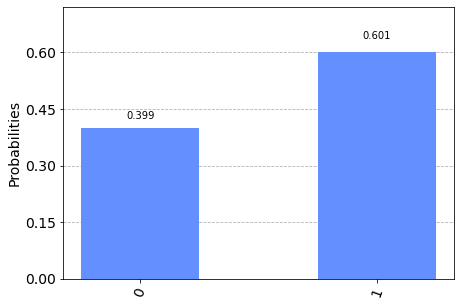

In [6]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc3,backend).result()
counts = result.get_counts()
plot_histogram(counts)